<a href="https://colab.research.google.com/github/oektomo/KelasRLG2/blob/master/QLFrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
"""
Created on Wed Mar 13 00:58:25 2019

@author: tawehbeysolow
mod by otm for RL-teams in OFA 
"""
import os, time, gym, numpy as np

#Parameters
learning_rate = 1e-2
gamma = 0.96
epsilon = 0.9
n_episodes = 10000 # training episode
reward_training = []
max_steps = 100
environment = gym.make('FrozenLake-v0')
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n))

In [41]:
def choose_action(state):
    '''
    To be used after Q table has been updated, returns an action
    
    Parameters:
        
        state - int - the current state of the agent 
        
    :return: int
    '''   
    return np.argmax(Q_matrix[state, :])

In [42]:
def exploit_explore(prior_state, epsilon=epsilon, Q_matrix=Q_matrix):    
    '''
    One half of the exploit-explore paradigm that we will utilize 
    
    Parameters 
        
        prior_state - int  - the prior state of the environment at a given iteration
        epsilon - float - parameter that we use to determine whether we will try a new or current best action 
        
    :return: int
    '''
    
    if np.random.uniform(0, 1) < epsilon:
        return environment.action_space.sample()
    else:
        return np.argmax(Q_matrix[prior_state, :])

In [43]:
def update_q_matrix(prior_state, observation , reward, action):
    '''
    Algorithm that updates the values in the Q table to reflect knowledge acquired by the agent 
    
    Parameters 
    
        prior_state - int  - the prior state of the environment before the current timestemp
        observation - int  - the current state of the environment
        reward - int - the reward yielded from the environment after an action 
        action - int - the action suggested by the epsilon greedy algorithm 
        
    :return: None
    '''
    
    prediction = Q_matrix[prior_state, action]
    actual_label = reward + gamma * np.max(Q_matrix[observation, :])
    Q_matrix[prior_state, action] = Q_matrix[prior_state, action] + learning_rate*(actual_label - prediction)
    

In [44]:
def populate_q_matrix(render=False, n_episodes=n_episodes):
    '''
    Directly implementing Q Learning (Greedy Epsilon) on the Frozen Lake Game
    This function populations the empty Q matrix 
    Parameters 
    
        prior_state - int  - the prior state of the environment before the current timestemp
        observation - int  - the current state of the environment
        reward - int - the reward yielded from the environment after an action 
        action - int - the action suggested by the epsilon greedy algorithm 
        
    :return: None
    '''    
    
    for episode in range(n_episodes):
        prior_state = environment.reset()
        _ = 0
        
        while _ < max_steps:
            
            if render == True: environment.render()
            action = exploit_explore(prior_state)  
            observation, reward, done, info = environment.step(action)      
            
            update_q_matrix(prior_state=prior_state, 
                            observation=observation, 
                            reward=reward, 
                            action=action)
            
            prior_state = observation
            _ += 1
            
            if done:
                reward_training.append(reward)
                break

In [45]:
def play_frozen_lake(n_episodes):
    
    '''
    Directly implementing Q Learning (Greedy Epsilon) on the Frozen Lake Game
    This function uses the already populated Q Matrix and displays the game being used
    
    Parameters 
    
        prior_state - int  - the prior state of the environment before the current timestemp
        observation - int  - the current state of the environment
        reward - int - the reward yielded from the environment after an action 
        action - int - the action suggested by the epsilon greedy algorithm 
        
    :return: None
    '''        
        
    for episode in range(n_episodes):
        print('Episode: %s'%(episode+1))
        prior_state = environment.reset()
        done = False

        while not done: 
            environment.render()
            action = choose_action(prior_state)
            observation, reward, done, info = environment.step(action)
            prior_state = observation
            print(action)

            #if reward == 0:
                #time.sleep(0.5)
                #print(action)                
            #else:
            if reward != 0:
                print('You have won on episode %s!'%(episode+1))
                #time.sleep(5)
                os.system('clear')
                break

            if done and reward == -1:
                #print('You have lost this episode... :-/')
                print('You have lost on episode %s!'%(episode+1))
                #time.sleep(5)
                os.system('clear')
                break

            if done and reward == 0:
                print('You have lost on episode %s!'%(episode+1))
                environment.render()
                action = choose_action(prior_state)
                observation, reward, done, info = environment.step(action)
                break
        environment.render()

In [46]:
if __name__ == '__main__':
        
    populate_q_matrix(render=False)
    play_frozen_lake(n_episodes=2)

Episode: 1

SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
3
  (Up)
SFFF
FHFH
FFFH
HFFG
1
  (Down)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG
2
You have won on episode 1!
  (Right)
SFFF
FHFH
FFFH
HFFG
Episode: 2

SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Lef

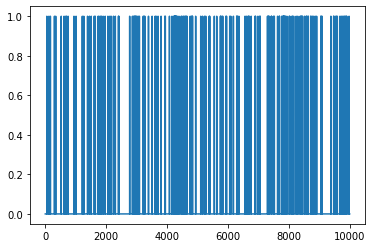

In [49]:
import matplotlib.pyplot as plt
plt.plot(reward_training)

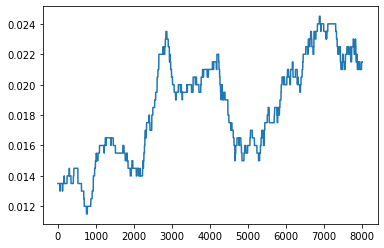

In [65]:
import pandas as pd
window_size = 2000
number_series = pd.Series(reward_training)
windows = number_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
final_list = moving_averages_list[window_size-1:]
plt.plot(final_list)

In [59]:
len(moving_averages_list)

10000